In [120]:
library(MASS)
library(ggplot2)
library(gridExtra)
install.packages('gridExtra')
install.packages("plotly")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Parte 1

De la base de datos de proyecciones poblacionales de CONAPO, hacer al menos 5 visualizaciones para entender el crecimiento poblacional. Se tienen muchas variables y categorías por explorar, se espera un análisis y contexto de las gráficas así como una interpretación.

## Parte 2

Con la misma base de datos, se requiere hacer todas las visualizaciones interactivas; las mismas 5 o más visualizaciones, ahora interactivas (recuerden plot.ly). Sugerencia: el año tiene que ser una de estas categorías ya que son proyecciones

## Parte 3

Hacer todos los ejercicios hechos durante la clase.
- Ejercicios durante la sesión 1
- Visualizaciones interactivas para el cruce de variables filtrado por sexo.

**Velocidad de la luz**

Tenemos 5 experimentos con 20 corridas de mediciones de la velocidad de la luz.

¿Cómo exponen los resultados?
¿Los resultados se ven equivalentes entre los experimentos?

In [29]:
vl <- data.frame(michelson)
head(vl)

,Speed,Run,Expt
,<int>,<fct>,<fct>
1,850,1,1
2,740,2,1
3,900,3,1
4,1070,4,1
5,930,5,1
6,850,6,1


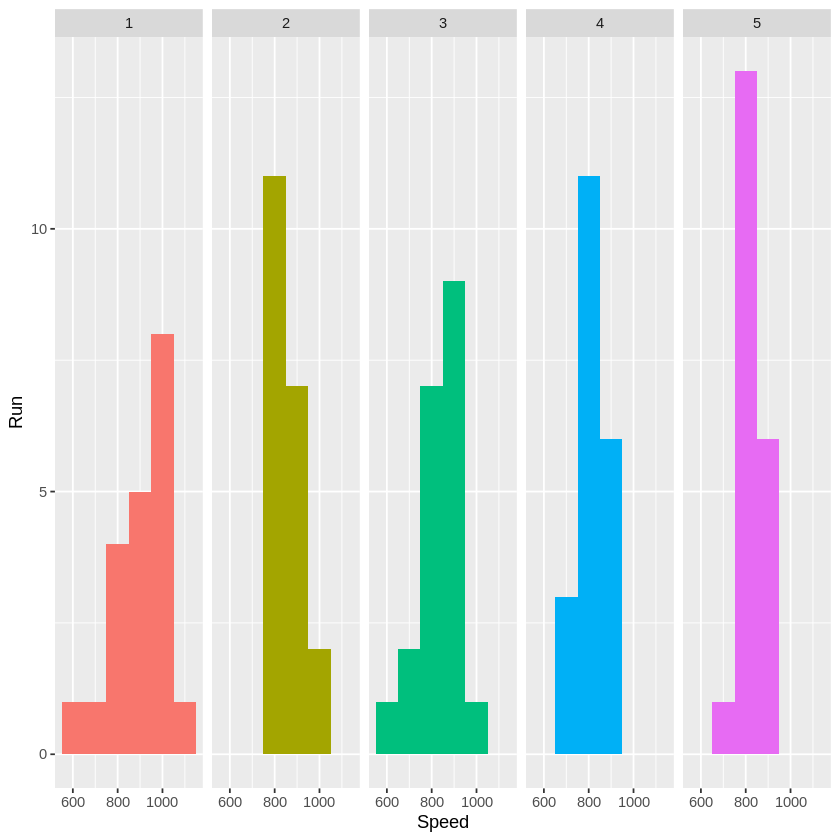

In [30]:
ggplot(vl, aes(Speed, fill=Expt)) + #speed=la variable que me interesa, fill=partir los colores en función de los experimentos
    geom_histogram(binwidth = 100) + xlab("Speed") + #genero el histograma y declaro mis ejes
    ylab("Run") + facet_grid(~Expt) +
    theme(legend.position = 'none')

Cada color indica que se trata de un experimento diferente, en el eje de las X estamos indicando la velocidad de la luz, mientras que en el eje de las Y establecemos la "corrida" de la que se trate. Nos percatamos de que hay cierta similitud en algunos experimentos (1 y 3, 2 y 4), lo que podría resultar en una cierta equivalencia entre ellos. 

**Pima Indians**

¿Qué dice este gráfico de barras?

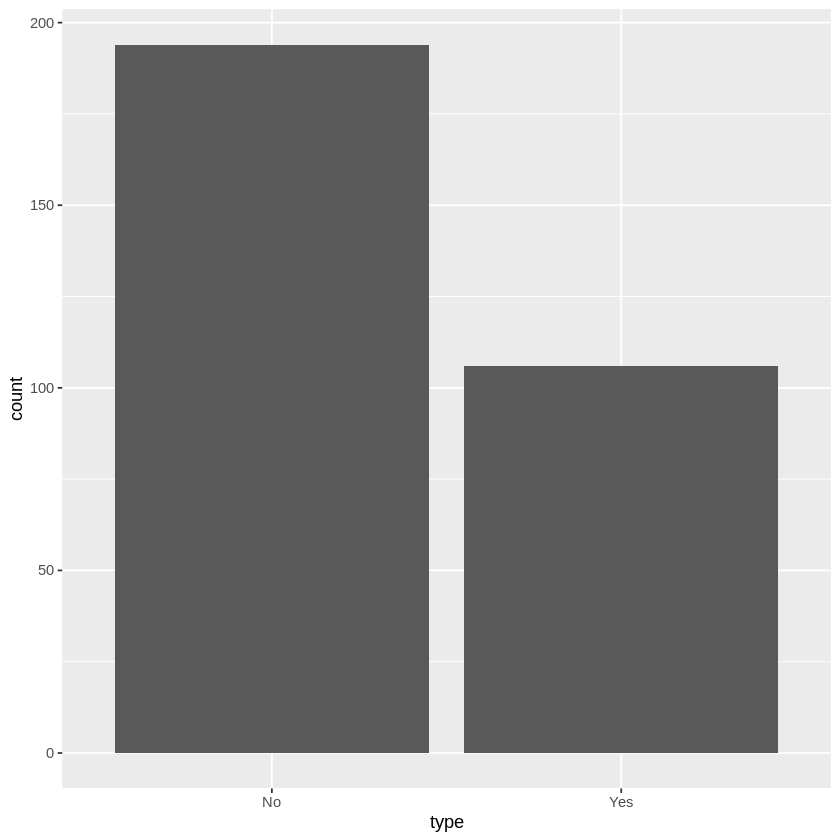

In [31]:
ggplot(Pima.tr2, aes(type))+geom_bar()

In [32]:
help(Pima.tr2)

Pima es una base de datos aplicada a mujeres de al menos 21 años de Pima Indian Heritage. El gráfico indica la cantidad de mujeres que tienen diabetes y la cantidad de mujeres que no tienen diabetes.

¿Por qué la parte superior izquierda está vacía?

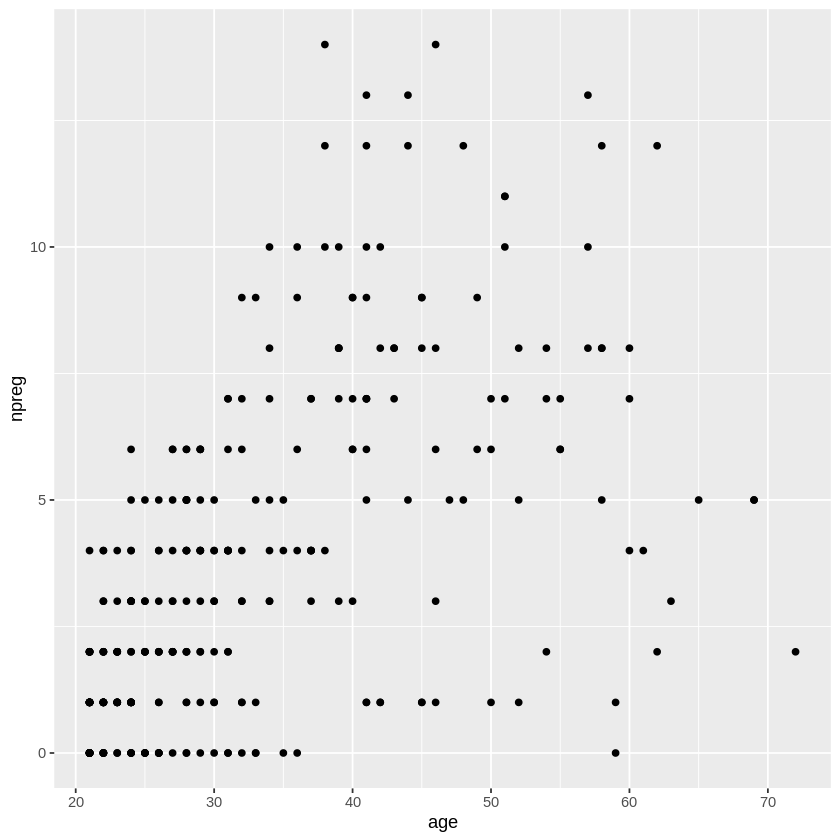

In [33]:
ggplot(Pima.tr2, aes(age,npreg))+geom_point()

Esta vacía porque para los embarazos se necesitan (en general) 9 meses, es decir, requiere que las mujeres tengan más edad, en el caso de las mujeres de aprox. 20 años es menor la probabilidad de que tengan una mayor cantidad de embarazos.

**Titanic**

In [34]:
head(data.frame(Titanic))

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


In [17]:
help(Titanic)

¿Qué se les ocurre para graficar todo?

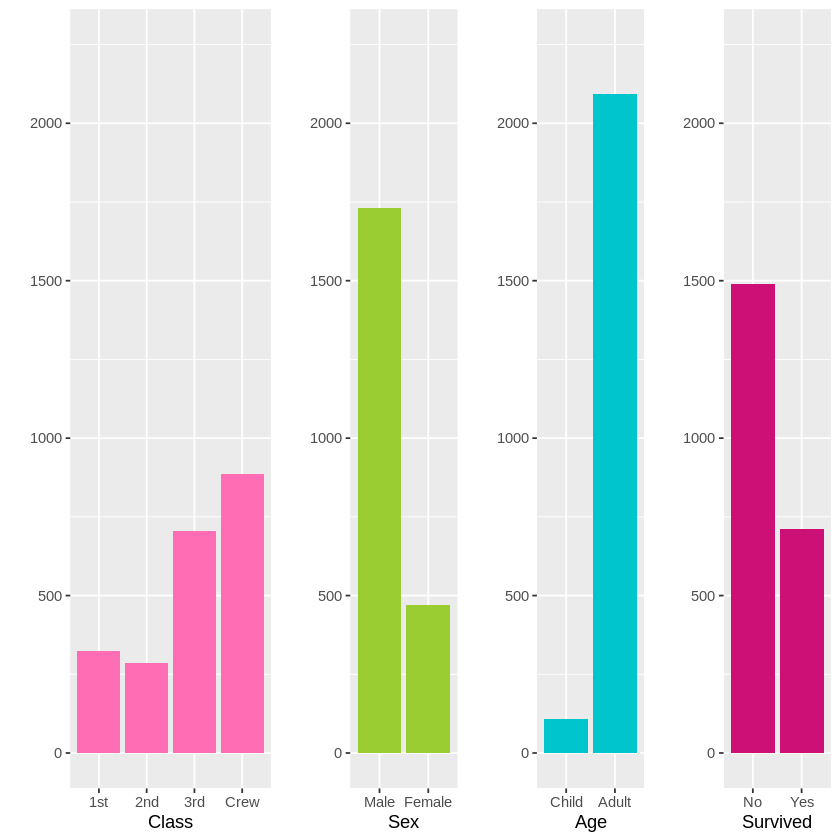

In [49]:
tit <- data.frame(Titanic)
p <- ggplot(tit, aes(weight=Freq)) + #gráfica general (total) a partir de la que graficaré cada variable
            ylab("") + ylim(0,2250)
class <- p + aes(Class) + geom_bar(fill="hotpink1") #"subgráfica" para la variable clase
sex <- p + aes(Sex) + geom_bar(fill="yellowgreen") #"subgráfica" para la variable sexo
age <- p + aes(Age) + geom_bar(fill="turquoise3")  #"subgráfica" para la variable edad
survived <- p + aes(Survived) + geom_bar(fill="deeppink3")  #"subgráfica" para la variable sobrevivencia
grid.arrange(class, sex, age, survived, nrow=1, widths=c(3, 2, 2, 2))

¿Cuántos pasajeros en total viajaban por clase?

In [50]:
data.frame(tit) %>%
group_by(Class) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Class,count
<fct>,<dbl>
1st,325
2nd,285
3rd,706
Crew,885


Exploren una por una las otras variables categóricas del dataset

In [51]:
data.frame(tit) %>%
group_by(Sex) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Sex,count
<fct>,<dbl>
Male,1731
Female,470


In [52]:
data.frame(tit) %>%
group_by(Age) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Age,count
<fct>,<dbl>
Child,109
Adult,2092


In [53]:
data.frame(tit) %>%
group_by(Survived) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Survived,count
<fct>,<dbl>
No,1490
Yes,711


Visualizaciones interactivas para el cruce de variables filtrado por sexo.

In [114]:
data.frame(tit) %>%
group_by(Sex, Class) %>% 
summarise(count = sum(Freq))

`summarise()` regrouping output by 'Sex' (override with `.groups` argument)



Sex,Class,count
<fct>,<fct>,<dbl>
Male,1st,180
Male,2nd,179
Male,3rd,510
Male,Crew,862
Female,1st,145
Female,2nd,106
Female,3rd,196
Female,Crew,23


In [126]:
tit <- c("1st", "2nd", "3rd", "Crew")
Male <- c(180,179,510,862)
Female <- c(145,106,196,23)
data <- data.frame(tit,Male, Female)

plot_ly(data, x= ~tit, y = ~Male, type = 'bar', name = 'Male') %>%
  add_trace(y = ~Female, name = 'Female') %>%
  layout(yaxis = list(title = 'Count'), barmode = 'stack')

ERROR: Error in plot_ly(data, x = ~tit, y = ~Male, type = "bar", name = "Male"): could not find function "plot_ly"


In [ ]:
d <- tit[sample(nrow(diamonds), 1000), ]
plot_ly(d, x = ~carat, y = ~price, color = ~carat,
        size = ~carat, text = ~paste("Clarity: ", clarity))

**Swiss**

Tenemos datos de fertilidad y otras variables socioeconómicas de 47 provincias franco-parlantes en Swiza en 1888.

In [54]:
head(data.frame(swiss))

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


In [68]:
help(swiss)

¿Cómo conjuntarían todas las variables?

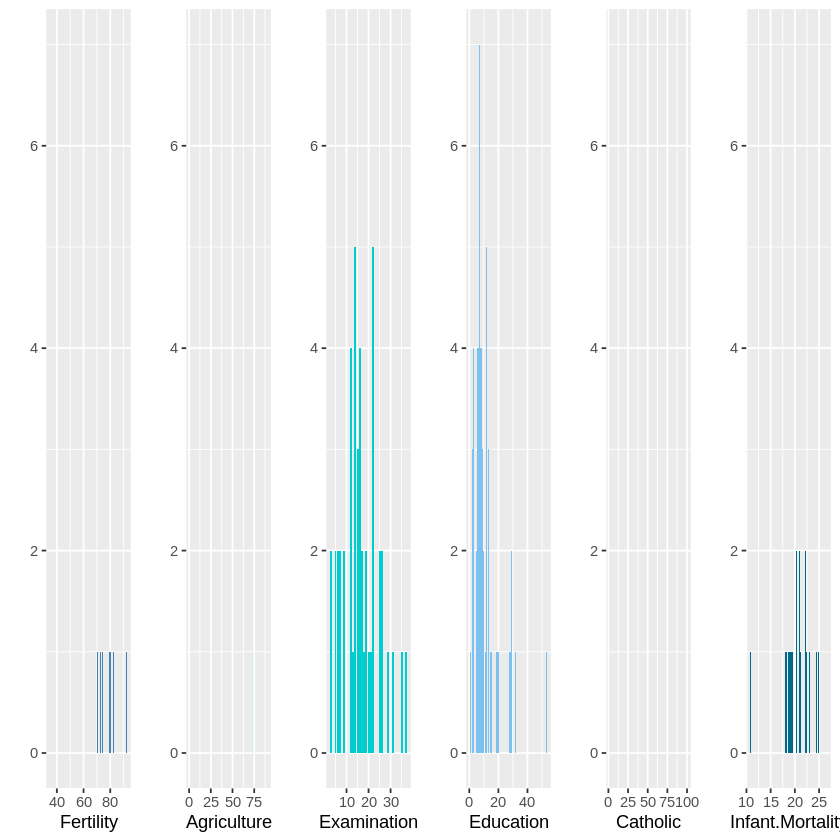

In [112]:
sw <- data.frame(swiss)
p <- ggplot(sw, aes(weight)) + ylab("") + ylim(0,7)
f <- p + aes(Fertility) + geom_bar(fill="steelblue")
a <- p + aes(Agriculture) + geom_bar(fill="lightcyan2")
e <- p + aes(Examination) + geom_bar(fill="cyan3")
ed <- p + aes(Education) + geom_bar(fill= "skyblue2")
c <- p + aes(Catholic) + geom_bar(fill="cadetblue3")
im <- p + aes(Infant.Mortality) + geom_bar(fill="deepskyblue4")
grid.arrange(f, a, e, ed, c, im, nrow=1, widths=c(2,2,2,2,2,2))

Hagan gráficas para cada variable. ¿Se ve algo especial o raro?

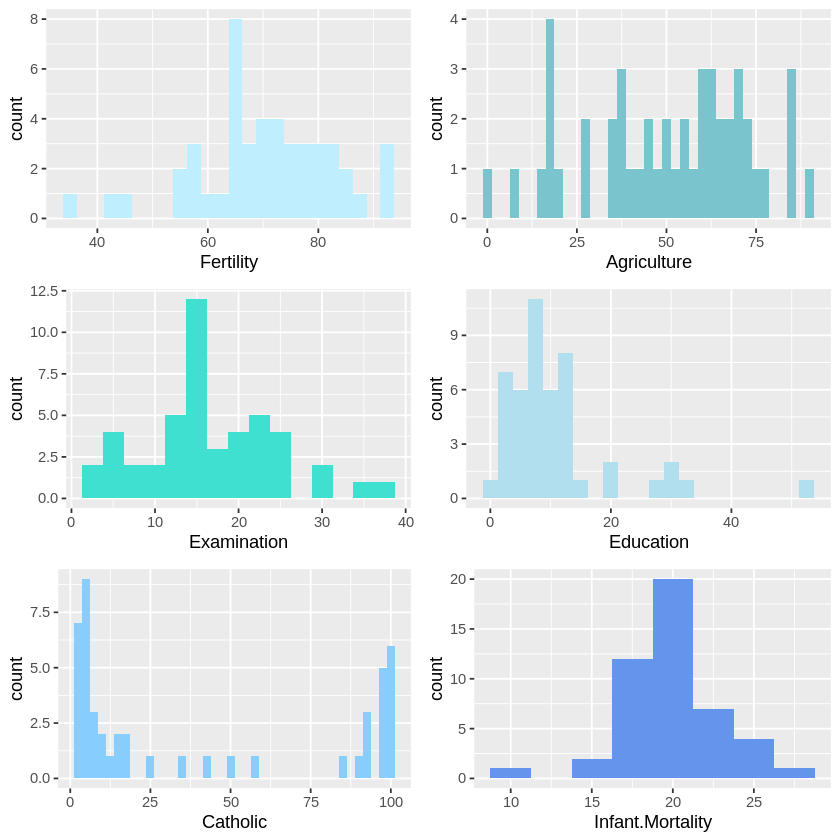

In [91]:
fer <- ggplot(sw, aes(Fertility)) + geom_histogram(binwidth = 2.5, fill = "lightblue1")
agr <- ggplot(sw, aes(Agriculture)) + geom_histogram(binwidth = 2.5, fill = "cadetblue3")
ex <- ggplot(sw, aes(Examination)) + geom_histogram(binwidth = 2.5, fill = "turquoise")
edu <- ggplot(sw, aes(Education)) + geom_histogram(binwidth = 2.5, fill = "lightblue2")
cath <- ggplot(sw, aes(Catholic)) + geom_histogram(binwidth = 2.5, fill = "skyblue1")
inf <- ggplot(sw, aes(Infant.Mortality)) + geom_histogram(binwidth = 2.5, fill = "cornflowerblue")
grid.arrange(fer, agr, ex, edu, cath, inf, nrow=3)

En el eje x tenemos el porcentaje de las variables, mientras que en el eje y tenemos la cantidad de distritos que presentan los mismos valores. Lo que se ve especial es que las variables adquieren valores muy distintos entre sí, no hay equivalencia entre ellas. 

Hagan un scatterplot de Fertilidad vs el porcentaje de católicos. ¿Se ve algo interesante?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



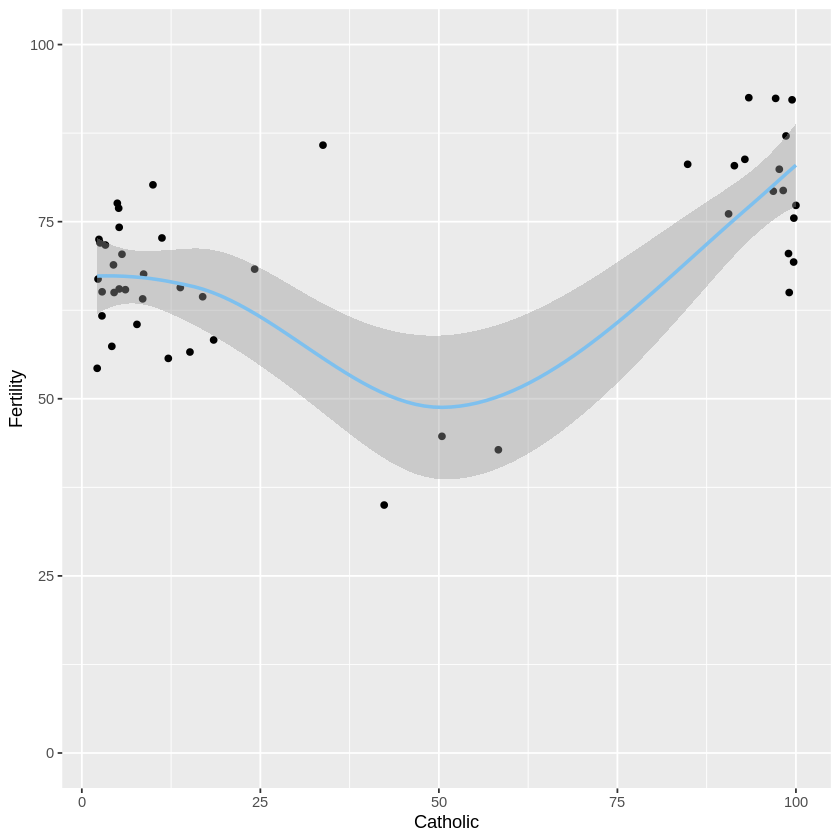

In [83]:
ggplot(sw, aes(Catholic, Fertility)) + geom_point() +
       geom_smooth(colour="skyblue2") + ylim(0,100)

A mayor porcentaje de católicos sí se registra un incremento en la fertilidad, sin embargo, resulta interesante que también hay niveles elevados de fertilidad en aquellos distritos con un porcentaje menor al 25% de católicos. 

¿Hay relación entre agricultura y Educación?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



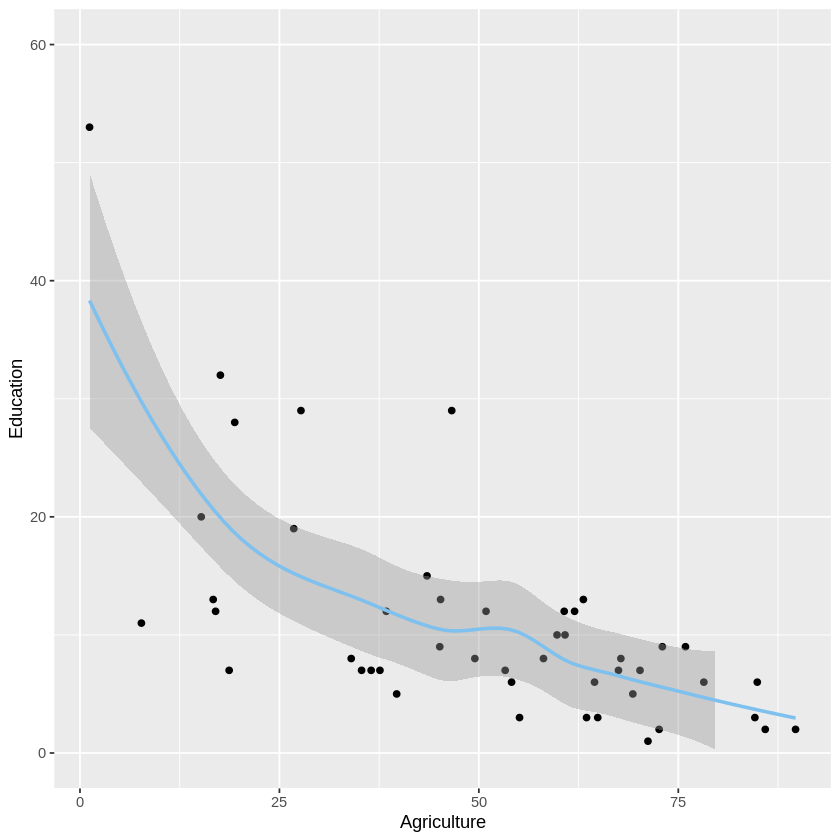

In [93]:
ggplot(sw, aes(Agriculture, Education)) + geom_point() +
       geom_smooth( colour="skyblue2") + ylim(0,60)

Aunque no hay mucha concentración, sí es perceptible que a medida que aumenta el porcentaje de agricultura disminuye el de educación